# Desafio Módulo 2 - Bootcamp Alura Data Science Aplicada 2

![](https://federacaors.org.br/wp-content/uploads/2019/09/vacina-argumento-pais-contra-600x400.jpg)

## Antonio Drago Caetano
https://www.linkedin.com/in/antoniodragoc/

https://github.com/dragoc1

# Introdução

Para o segundo projeto do Bootcamp de Data Science Aplicada 2, que durante o Módulo 02 foi abordado métodos de tratamento, exploração dos dados e escolha de cores para melhor visualização dos dados, foi proposto como desafio final a análise de dados do programa de imunização nacional ([link](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def)).

Para análise foi escolhida as doses aplicadas da vacina BCG que tem como publico-alvo todas as crianças com até um ano de idade.

Nos anos de 2017 e 2018 a BCG, vacina que previne a tuberculose foi a única a atingir a meta anual de cobertura vacinal com cobertura de 96,41% em 2017 e 96,09% em 2018. [[1]](https://federacaors.org.br/bcg-e-a-unica-vacina-a-atingir-meta-de-imunizacao-desde-2017-no-brasil/)


# Objetivos

Analisar as doses de vacinas aplicadas durante o período entre 2000 e 2018, separando os dados por região e por estados;

Proporção do número de doses com a população nascida nos anos em questão;

Observar a quantidade de doses ano após ano e comparar com a quantidade de nascimentos durante o mesmo período.


# Análises
- Número de doses;
- Número de nascidos vivos;
- Porcentagem da população com até um ano que recebeu a vacina;
- Comparação do número de doses aplicadas com o número de nascimentos no período.


# Importação das bibliotecas

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib.ticker import NullFormatter
import seaborn as sns
import warnings
import datetime
from datetime import datetime, date

sns.set_style("darkgrid")

#ignorar os avisos do python
warnings.filterwarnings('ignore')
# Fomatação do Pandas
#pd.options.display.float_format='{:.2f}'.format


# Definindo funções


In [42]:
def estado_index(data):
    data['Unidade da Federação'] = data['Unidade da Federação'].str[3:]
    data = data.set_index(data.columns[0])
    data.index.names = ['uf']
    return data

In [43]:
def coluna_regiao(data):
    a = data['Unidade da Federação'].astype(str).str[0]
    # Criando o dicionário com chave e valor, onde os valores atuais serão substituidos pelas Regiões 
    dict_regiao = {'1':'Norte','2':'Nordeste','3':'Sudeste','4':'Centro Oeste','5':'Sul'}
    regiao = a.replace(dict_regiao,regex=True)

    data.insert(value = regiao, column = 'Região', loc = 1)

In [44]:
def plot_semana(data,y,hue,titulo):
    # Parâmetros
    data = data.sort_values(by=['last_available_confirmed'], ascending=False)
    x = 'epidemiological_week'
    y = y
    hue = hue
    title = titulo + ' (Covid-19) - Atualizado: {}'.format(df['last_available_date'].max())
    x_label = 'Semana epidemiológica'
    y_label = 'Casos confirmados'

    # criando gráfico
    ax = sns.lineplot(
        data=data,
        x=x,
        y=y,
        hue = hue,
        palette = "rocket",
        ci = None)

    # Plot
    ax.figure.set_size_inches((16, 9))
    ax.set_title(title, fontsize = 20)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(x_label, fontsize= 14)
    ax.set_ylabel(y_label, fontsize = 14)
    ax.grid(color='grey', linestyle='-.', linewidth=0.5)
    plt.vlines(
        x = 54, 
        ymin = 0, 
        ymax = data[y].max(),
        ls = '--', color ='black', alpha = 0.4)
    plt.text(53,data[y].max()/2,'2021',rotation=90, fontsize = 12,color ='black', alpha = 0.4)
    ax;

In [45]:
#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

def plot_dia(data,y,hue,titulo):
    # Parâmetros
    data = data.sort_values(by=['date'])
    x = 'date'
    y = y
    hue = hue
    title = titulo + ' (Covid-19) - Atualizado: {}'.format(df['date'].max())
    x_label = ''
    y_label = 'Casos confirmados'

    # criando gráfico
    ax = sns.lineplot(
        data=data,
        x=x,
        y=y,
        hue = hue,
        palette = "rocket",
        ci = None)

    # Plot
    ax.figure.set_size_inches((16, 9))
    ax.set_title(title, fontsize = 20)    
    ax.grid(color='grey', linestyle='-.', linewidth=0.5)
    
    # axis
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    ax.xaxis.set_minor_locator(YearLocator())
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b-%y'))
    
    # Legenda e label
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(x_label, fontsize= 14)
    ax.set_ylabel(y_label, fontsize = 14)
    ax;

In [46]:
def convert_date(ano_mes):
    meses = {
        "Jan":1,
        "Fev":2,
        "Mar":3,
        "Abr":4,
        "Mai":5,
        "Jun":6,
        "Jul":7,
        "Ago":8,
        "Set":9,
        "Out":10,
        "Nov":11,
        "Dez":12
    }


    ano = int(ano_mes[:4])
    mes = ano_mes[5:]
    mes_numero = int(meses[mes])
    return date(ano,mes_numero,1)

# Map: aplica a função em todas as linhas do index
#df.columns = df.columns.map(convert_date)
#mensal = mensal.index = mensal.index.map(convert_date)

#mensal.index.name = "Data"

#mensal.head()

# Importação dos dados

In [47]:
df_bcg = pd.read_csv(r'./dados/doses_bcg.csv',encoding= 'ISO-8859-1', sep=';', skiprows=4, skipfooter=20,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')
df_bcg = df_bcg.drop('Total', axis = 1)

In [48]:
df_born = pd.read_csv(r'./dados/nascimentos_tabnet.csv',encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=13,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')
df_born = df_born.drop('Total',axis = 1)

In [49]:
df_born = estado_index(df_born)
df_bcg = estado_index(df_bcg)

In [50]:
df_born.tail()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
uf,,,,,,,,,,,,,,,,,,,
Rio Grande do Sul,176469,160493,155186,149128,153021,147303,141576,133568,135274,133828,133424,137870,139129,141491,143440,148415,141446,141608,140052
Mato Grosso do Sul,40361,39939,39890,39085,41378,41125,39309,38378,41045,39979,39805,41805,41876,41879,43588,43665,42009,44265,43767
Mato Grosso,49401,47605,47744,48583,51152,52318,49421,47325,49760,48422,48822,51168,51126,52939,56386,56617,53346,57202,58548
Goiás,85318,84933,84475,82449,81642,82089,77683,75900,77956,77549,77039,77903,81052,82262,86316,87673,83605,85466,86613
Distrito Federal,58021,55344,55565,56222,55626,55899,55368,53868,54115,54260,55185,55861,56339,57594,58909,59659,55900,57163,57108


In [51]:
df_bcg.tail()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
uf,,,,,,,,,,,,,,,,,,,
Rio Grande do Sul,181810,167780,160980,154845,156086,151953,144276,133823,133708,132519,128689,135249,135305,152706,146024,146604,135316,131199,125517
Mato Grosso do Sul,49227,48083,45898,42407,41490,42562,41219,40891,42209,41991,42367,43275,42421,47717,54796,54808,46745,46659,45618
Mato Grosso,60344,57838,57283,56180,57119,59693,55447,55731,56127,54025,47812,50895,52072,54578,57293,57884,54535,54201,56181
Goiás,103027,102643,105909,102451,106037,106460,102954,101722,104499,101125,103479,105101,98627,104426,107674,99737,92058,91133,88978
Distrito Federal,61784,57632,53535,53340,52597,50179,49407,47040,47672,49081,49799,43221,46791,57898,49377,34839,61673,44022,38973


In [52]:
df_bcg.loc['São Paulo']/df_born.loc['São Paulo']

2000    1.104182
2001    1.108726
2002    1.089235
2003    1.087987
2004    1.090930
2005    1.063442
2006    1.042827
2007    1.014588
2008    1.040882
2009    1.023134
2010    1.007666
2011    1.015053
2012    1.007353
2013    1.032946
2014    1.016758
2015    0.982268
2016    0.978732
2017    1.025319
2018    0.978554
Name: São Paulo, dtype: float64

In [53]:
df_bcg[df_bcg.columns[-1]]/df_born[df_born.columns[-1]]

uf
Rondônia               0.882960
Acre                   0.917458
Amazonas               0.955142
Roraima                1.136913
Pará                   0.825454
Amapá                  0.913073
Tocantins              0.979432
Maranhão               0.964431
Piauí                  0.876703
Ceará                  0.990999
Rio Grande do Norte    0.996443
Paraíba                0.979315
Pernambuco             0.997828
Alagoas                1.034151
Sergipe                0.937893
Bahia                  0.816294
Minas Gerais           0.955449
Espírito Santo         0.945631
Rio de Janeiro         1.041049
São Paulo              0.978554
Paraná                 0.936599
Santa Catarina         0.877247
Rio Grande do Sul      0.896217
Mato Grosso do Sul     1.042292
Mato Grosso            0.959572
Goiás                  1.027305
Distrito Federal       0.682444
Name: 2018, dtype: float64

In [54]:
df_bcg[df_bcg.columns[-2]]/df_born[df_born.columns[-2]]

uf
Rondônia               0.984776
Acre                   0.959608
Amazonas               0.977038
Roraima                1.107942
Pará                   0.888141
Amapá                  0.938732
Tocantins              1.077369
Maranhão               1.036933
Piauí                  0.900092
Ceará                  1.091175
Rio Grande do Norte    0.684493
Paraíba                1.029656
Pernambuco             1.020299
Alagoas                1.147576
Sergipe                0.959185
Bahia                  0.868716
Minas Gerais           0.958368
Espírito Santo         0.920523
Rio de Janeiro         1.202492
São Paulo              1.025319
Paraná                 0.972262
Santa Catarina         0.803875
Rio Grande do Sul      0.926494
Mato Grosso do Sul     1.054083
Mato Grosso            0.947537
Goiás                  1.066307
Distrito Federal       0.770114
Name: 2017, dtype: float64

In [55]:
def plot_last_year(data,ylabel,title, palette):
    last_year = data.columns[-1]
    df_plot = data.sort_values(by=last_year,ascending=False)

    plt.figure(figsize=(12,9))
    ax = sns.barplot(
        data = df_plot,
        x = df_plot.index,
        y = last_year,
        palette= sns.color_palette(palette, len(df_plot.index.unique()))        
    )


    ax.set_xlabel('')
    ax.set_ylabel(ylabel)

    plt.title(title+' no ano de '+last_year, fontsize = 18)
    plt.xticks(rotation = 70)
    plt.legend('')
    plt.show()


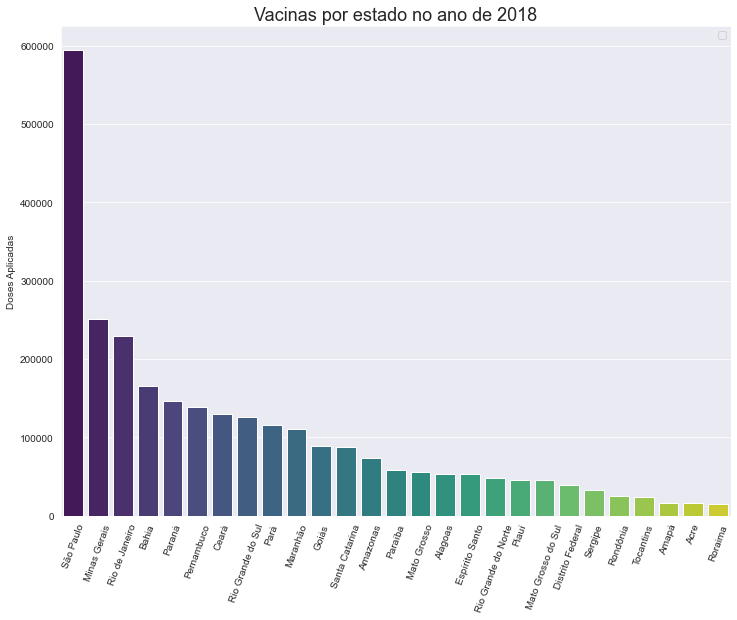

In [56]:
plot_last_year(df_bcg, 'Doses Aplicadas', 'Vacinas por estado', 'viridis')

# Número de nascimentos

## Análise por região

In [58]:
born_estados = df_born.T
born_estados.index.name = "ano"
born_estados = born_estados.reset_index().melt(id_vars='ano', value_vars=born_estados.columns)
born_estados.columns = ['ano', 'uf', 'nascidos']
#born_estados['ano'] = born_estados['ano'].astype('datetime64').dt.year


In [60]:
sudeste = ['São Paulo', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro']
born_sudeste = born_estados.query("uf in @sudeste").groupby(['nascidos','uf','ano']).sum().reset_index()
born_sudeste.head()

,nascidos,uf,ano
0,50870,Espírito Santo,2007
1,51284,Espírito Santo,2009
2,51439,Espírito Santo,2006
3,51615,Espírito Santo,2010
4,51674,Espírito Santo,2008


<Figure size 1152x648 with 0 Axes>

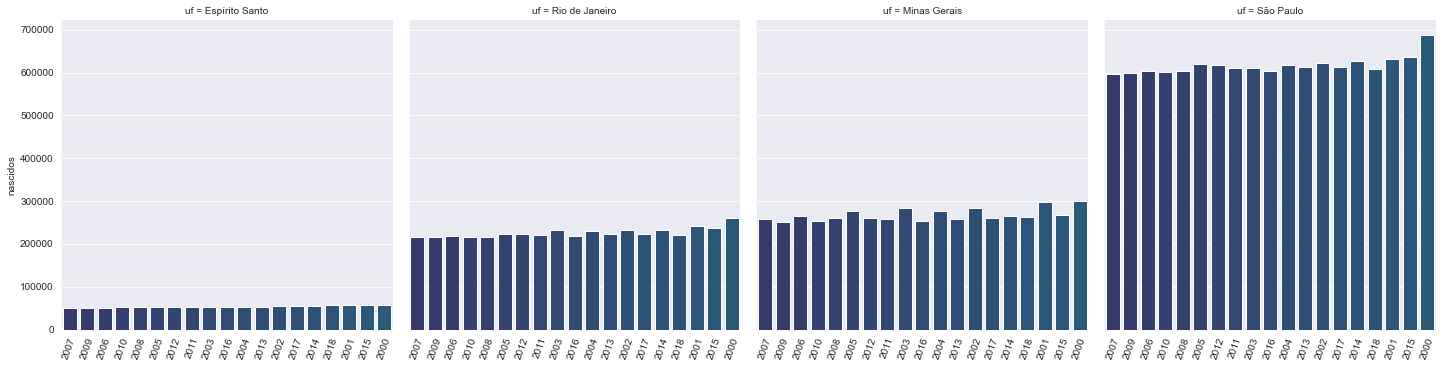

In [61]:
plt.figure(figsize= (16,9))
sns.set_style("darkgrid")
ax = sns.catplot(data = born_sudeste, x = 'ano', y = 'nascidos', kind = 'bar',col = 'uf',palette= sns.color_palette('crest_r', len(born_sudeste.index.unique())))

#plt.title('Nascimentos anuais na região Sudeste' , fontsize = 18)
#ax.set_title('eu')
ax.set_xticklabels(rotation =  70 )
ax.set_xlabels('')

plt.show()

In [62]:
nordeste = ['Alagoas','Bahia','Ceará','Maranhão','Paraíba','Pernambuco','Piauí','Rio Grande do Norte', 'Sergipe']
born_nordeste = born_estados.query("uf in @nordeste").groupby(['nascidos','uf','ano']).sum().reset_index()
born_nordeste.head()

,nascidos,uf,ano
0,33159,Sergipe,2016
1,35061,Sergipe,2017
2,35264,Sergipe,2010
3,35455,Sergipe,2018
4,35815,Sergipe,2012


<Figure size 1152x648 with 0 Axes>

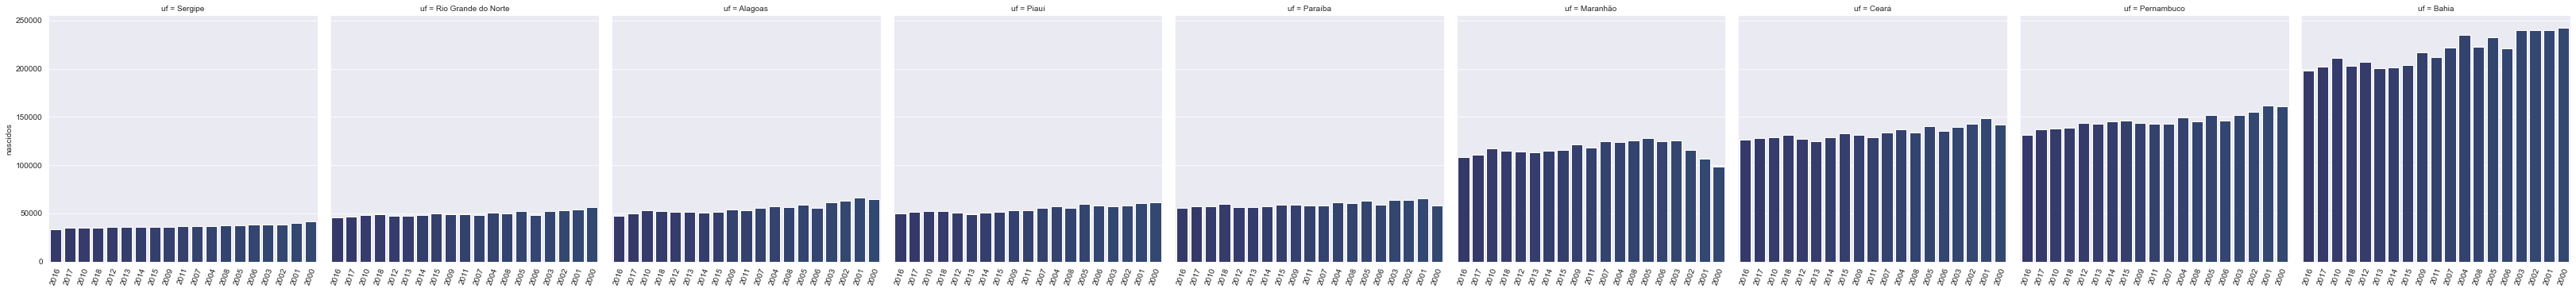

In [63]:
plt.figure(figsize= (16,9))
data = born_nordeste

ax = sns.catplot(data = data, x = 'ano', y = 'nascidos', kind = 'bar',col = 'uf',palette= sns.color_palette('crest_r', len(data.index.unique())))

#plt.title('Nascimentos anuais na região Sudeste' , fontsize = 18)
#ax.set_title('eu')
ax.set_xticklabels(rotation =  70 )
ax.set_xlabels('')

plt.show()

<AxesSubplot:xlabel='ano', ylabel='Espírito Santo'>

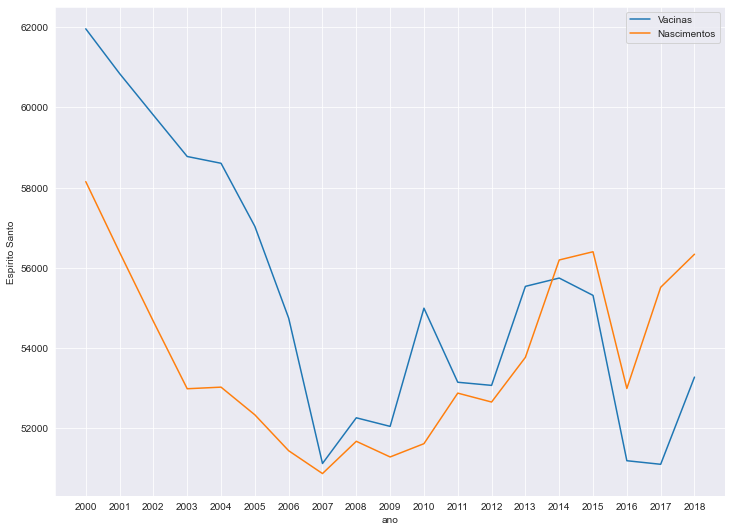

In [64]:
# Input's necessários para o plot
data = df_bcg.T
x = data.index
y = 'Espírito Santo'

# Criação da figura 
fig, ax = plt.subplots(figsize = (12,9))
sns.lineplot(data = df_bcg.T, x = df_bcg.T.index, y = y, label= 'Vacinas')
sns.lineplot(data = df_born.T, x = df_born.T.index, y = y, label ='Nascimentos')

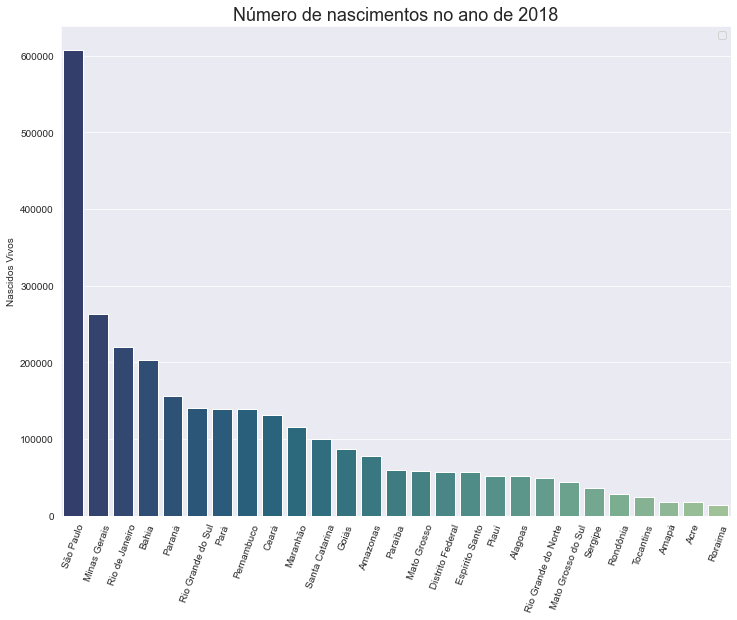

In [65]:
plot_last_year(df_born, 'Nascidos Vivos', 'Número de nascimentos', 'crest_r' )

# Conclusões

# Referências 

1 - https://federacaors.org.br/bcg-e-a-unica-vacina-a-atingir-meta-de-imunizacao-desde-2017-no-brasil/